# Classifying fish cages and time

Classifying larger audio samples from a hydrophone in fish cages to differenciate between two fish cages and if the audio is taken at daytime (08 AM - 17 PM) or nighttime (17 PM - 08 AM).


In [2]:
from ipynb.fs.defs.save_data_2classes import *

from ipynb.fs.defs.save_data_4classes import *

from pydub import AudioSegment 

from pydub.utils import make_chunks

import os

from ipynb.fs.defs.plot import *

from ipynb.fs.defs.model import *

from ipynb.fs.defs.mfcc import *

from sklearn.metrics import confusion_matrix

from keras.models import Sequential,Input,Model

import sklearn

## Split audio 
Split audio into files of 10 seconds each, and store them in a new folder

* Change the path to where your folders are places in the first string part of *chunk_name =* in function *process_audio*. 
* Change the path for each of your old folders *path_fc(1 or 2)_(day or night)*
* Assign a name to your new folders in *directory_fc(1 or 2)_(day or night)*.
* Change path to your new folders in the function *os.makedirs()* for all four folders.


In [7]:


def process_audio(file_name, directory):
    myaudio = AudioSegment.from_file(file_name, "wav") 
    chunk_length_ms = 10000 # pydub calculates in millisec 
    chunks = make_chunks(myaudio, chunk_length_ms) #make chunks of ten sec 
    for i, chunk in enumerate(chunks): 
        chunk_name =  r'C:\Users\jemilad\OneDrive - SINTEF\Desktop\\' + directory + '\\' + each_file  + "_{0}.wav".format(i) 
        print ("exporting", chunk_name) 
        chunk.export(chunk_name, format="wav") 

#Folder 1

path_fc1_day = r'C:\Users\jemilad\OneDrive - SINTEF\Desktop\d1' #path to old folder
directory_fc1_day = 'day_fc1_chunked' #name of new folder

all_file_names = os.listdir(path_fc1_day)
try:
    os.makedirs(r'C:\Users\jemilad\OneDrive - SINTEF\Desktop\\' + directory_fc1_day) # creating a folder 
except:
    pass
for each_file in all_file_names:
    if ('.wav' in each_file):
        process_audio(path_fc1_day + '\\' + each_file, directory_fc1_day) #runs function that splits the audio

#Folder 2
        
path_fc2_day = r'C:\Users\jemilad\OneDrive - SINTEF\Desktop\d2' 
directory_fc2_day = 'day_fc2_chunked' 

all_file_names = os.listdir(path_fc2_day)
try:
    os.makedirs(r'C:\Users\jemilad\OneDrive - SINTEF\Desktop\\' + directory_fc2_day)  
except:
    pass
for each_file in all_file_names:
    if ('.wav' in each_file):
        process_audio(path_fc2_day + '\\' + each_file, directory_fc2_day) 


        
#Folder 3

path_fc1_night = r'C:\Users\jemilad\OneDrive - SINTEF\Desktop\n1'
directory_fc1_night = 'night_fc1_chunked'

all_file_names = os.listdir(path_fc1_night)
try:
    os.makedirs(r'C:\Users\jemilad\OneDrive - SINTEF\Desktop\\' + directory_fc1_night) 
except:
    pass
for each_file in all_file_names:
    if ('.wav' in each_file):
        process_audio(path_fc1_night + '\\' + each_file, directory_fc1_night)

        
#Folder 4

path_fc2_night = r'C:\Users\jemilad\OneDrive - SINTEF\Desktop\n2'
directory_fc2_night = 'night_fc2_chunked'

all_file_names = os.listdir(path_fc2_night)
try:
    os.makedirs(r'C:\Users\jemilad\OneDrive - SINTEF\Desktop\\' + directory_fc2_night) 
except:
    pass
for each_file in all_file_names:
    if ('.wav' in each_file):
        process_audio(path_fc2_night + '\\' + each_file, directory_fc2_night)


exporting C:\Users\jemilad\OneDrive - SINTEF\Desktop\\day_fc1_chunked\RBW6134_20211130_134248.wav_0.wav
exporting C:\Users\jemilad\OneDrive - SINTEF\Desktop\\day_fc1_chunked\RBW6134_20211130_134248.wav_1.wav
exporting C:\Users\jemilad\OneDrive - SINTEF\Desktop\\day_fc1_chunked\RBW6134_20211130_134248.wav_2.wav
exporting C:\Users\jemilad\OneDrive - SINTEF\Desktop\\day_fc1_chunked\RBW6134_20211130_134248.wav_3.wav
exporting C:\Users\jemilad\OneDrive - SINTEF\Desktop\\day_fc1_chunked\RBW6134_20211130_134248.wav_4.wav
exporting C:\Users\jemilad\OneDrive - SINTEF\Desktop\\day_fc1_chunked\RBW6134_20211130_134248.wav_5.wav
exporting C:\Users\jemilad\OneDrive - SINTEF\Desktop\\day_fc1_chunked\RBW6134_20211130_134248.wav_6.wav
exporting C:\Users\jemilad\OneDrive - SINTEF\Desktop\\day_fc1_chunked\RBW6134_20211130_134248.wav_7.wav
exporting C:\Users\jemilad\OneDrive - SINTEF\Desktop\\day_fc1_chunked\RBW6134_20211130_134248.wav_8.wav
exporting C:\Users\jemilad\OneDrive - SINTEF\Desktop\\day_fc1_ch

## Split data into train and test

* Choose what you want to classify: only time (two classes) or time and fish cage (4 classes) and choose right function according to your choise of classes. Use function *make_data_4class* if you have four classes or *make_data_2class* if you have two classes.

Inputs are f1 (folder 1), f2 (folder 2), f3 (folder 3), f4 (folder 4) and datadir (path to your folders) for both functions.

* Change name of the folders (which you assigned above) in the function
* Change *datadir* which is the path to your folders.

The functions splits your data into train data, test data, targets for train, targets for test, categorical targets for train, categorical targets for test and sample rate


In [8]:
x_train4, x_test4, y_train4, y_test4, y_cat_train4, y_cat_test4, sr4 = make_data_4class(
                                                                    "day_fc1_chunked", "day_fc2_chunked", 
                                                                    "night_fc1_chunked","night_fc2_chunked",
                                                                    r"C:\Users\jemilad\OneDrive - SINTEF\Desktop")


#x_train4, x_test4, y_train4, y_test4, y_cat_train4, y_cat_test4, sr4 = make_data_2class(
#                                                                    "dagmerd3_chunked", "dagmerd7_chunked", 
#                                                                    "nattmerd3_chunked","nattmerd7_chunked",
#                                                                    r"C:\Users\jemilad\OneDrive - SINTEF\Desktop\audio", 2)


loading... category: day_fc1_chunked
loaded category: day_fc1_chunked successfully
loading... category: day_fc2_chunked
loaded category: day_fc2_chunked successfully
loading... category: night_fc1_chunked
loaded category: night_fc1_chunked successfully
loading... category: night_fc2_chunked
loaded category: night_fc2_chunked successfully


## Feature extraction: MFCCs
Run mfcc_data function to extract mfcc features from your data. 

Inputs are x_train, x_test and sample_rate. Use the outputs from the step above.


In [9]:
mfcc_train4, mfcc_test4 = mfcc_data(x_train4, x_test4, sr4)



## Train CNN model 

Run function *model_cnn*, with inputs number of classes, data and categorical target. Use the outputs from the step above. 

The function outputs a trained model that can predict the test data set. 


Epoch 1/100
7/7 [==============================] - 1s 80ms/step - loss: 28.4195 - accuracy: 0.2975 - val_loss: 19.7469 - val_accuracy: 0.2857
Epoch 2/100
7/7 [==============================] - 0s 13ms/step - loss: 21.5734 - accuracy: 0.4380 - val_loss: 6.1297 - val_accuracy: 0.7143
Epoch 3/100
7/7 [==============================] - 0s 12ms/step - loss: 10.5860 - accuracy: 0.4711 - val_loss: 1.7738 - val_accuracy: 0.5714
Epoch 4/100
7/7 [==============================] - 0s 12ms/step - loss: 6.1812 - accuracy: 0.6198 - val_loss: 0.5079 - val_accuracy: 0.7857
Epoch 5/100
7/7 [==============================] - 0s 12ms/step - loss: 3.1316 - accuracy: 0.6529 - val_loss: 6.7024 - val_accuracy: 0.3571
Epoch 6/100
7/7 [==============================] - 0s 12ms/step - loss: 3.7639 - accuracy: 0.6281 - val_loss: 2.4871 - val_accuracy: 0.7143
Epoch 7/100
7/7 [==============================] - 0s 12ms/step - loss: 2.0378 - accuracy: 0.7438 - val_loss: 0.9676 - val_accuracy: 0.7857
Epoch 8/100
7/7 

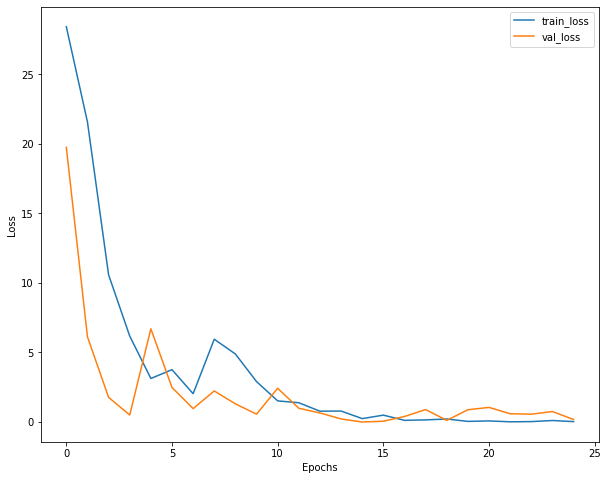

In [10]:
model = model_cnn(4, mfcc_train4, y_cat_train4)


## Test

Testing the model and printing confusion matrix for visualizing the results

* Insert the MFCC test data set given from **Feature extraction** in the function *model.predict()*.
* Name your targets, either four or two classes.
* Choose the right *for* loop for the amount of classes chosen.

                   precision    recall  f1-score   support

 dagmerd3_chunked       1.00      1.00      1.00        10
 dagmerd7_chunked       1.00      1.00      1.00         2
nattmerd3_chunked       1.00      1.00      1.00        12
nattmerd7_chunked       1.00      1.00      1.00        10

         accuracy                           1.00        34
        macro avg       1.00      1.00      1.00        34
     weighted avg       1.00      1.00      1.00        34



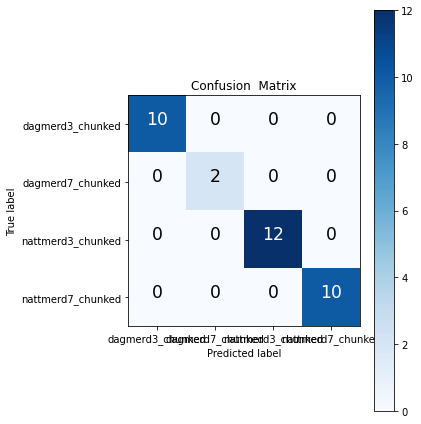

In [11]:

y_pred = model.predict(mfcc_test4) #predicting the test data

targets = ["dagmerd3_chunked", "dagmerd7_chunked", "nattmerd3_chunked", "nattmerd7_chunked"] #4 classes
#targets = ["dag", "natt"] #2 classes

y_predd=[]
for i in range(len(y_pred)): #4 classes
    max_value = max(y_pred[i])
    index = np.where(y_pred[i] == max_value)
    y_predd.append(index[0][0])
    
#for i in range(len(y_pred)): #2 classes
#        if y_pred[i]>0.5:
#            y_predd.append(1)
#        else:
#            y_predd.append(0)

cm = confusion_matrix(y_test4, y_predd)
plot_confusion_matrix(cm, targets)

class_rep = sklearn.metrics.classification_report(y_test4, y_predd, 
                                     target_names = targets)
print(class_rep)